# Validation of Zhu and others (2017)

In this section, we demonstrate that our implementation of the Zhu and others (2017) general model yields the same output as results reported in the original paper. In this case we compare against figures from a follow-up paper (Baise and Rashidian, 2017) because they propose additional ground motion thresholds that we are implementing and provide there aren't suitable figures in the Zhu and others (2017) paper to validate the general model. There may be slight differences due to different shakemap versions, resampling methods, or minor differences in the exact colorbars used.


## Haiti earthquake



In [7]:
#stdlib imports
from configobj import ConfigObj
import os
import pprint
import numpy as np
import matplotlib

#local imports
from gfail.logisticmodel import LogisticModel
from gfail.conf import correct_config_filepaths
from gfail.utilities import parseConfigLayers, parseMapConfig
from gfail import makemaps

%pylab inline

import warnings
warnings.filterwarnings('ignore')

# Set up file paths
# Directory containing model inputs
datadir = 'data/model_inputs/haiti'
# Path to mapping inputs for static plots
map_inputs = 'data/mapping_inputs/haiti'

# Path to config files
configfileZ2 = '../defaultconfigfiles/models/zhu_2017_general.ini'
mapconfig = '../defaultconfigfiles/mapconfig.ini'

# Path to shakemap .xml files
shakefile = 'data/shakemaps/haiti.xml'

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read in the config file for this model. This contains all of the information needed to run the model
config = ConfigObj(configfileZ2)

# append the data directory to the relative paths in the config file
config = correct_config_filepaths(datadir, config)
# View the config file
#pprint.pprint(config)

# Change to same resolution
config['zhu_2017_general']['divfactor'] = 10.

In [3]:
bounds = dict(xmin=-73.0, xmax=-71.7, ymin=17.9, ymax=19.25)

# Run the model (this will take a minute)
lmn = LogisticModel(shakefile, config, saveinputs=False, bounds=bounds)
maplayers = lmn.calculate()

Loading vs30 layer: 0.3 sec
Loading wtd layer: 0.3 sec
Loading precip layer: 0.3 sec
Loading dr layer: 0.3 sec
Loading dc layer: 0.2 sec


### Change bins to match figure from paper


In [4]:
lims = [[-0.05, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]]
colorlist = ['#97999F','#5CFD2F', '#FDFC37', '#F7A929', '#FC0D1B', '#FC0D1B']  #hex code for colors in figure below
CustomCmap = matplotlib.colors.ListedColormap(colorlist)
colormap = [CustomCmap]

maskthresh = [0.001]  # to represent gray color on figure

### Create the figure

roadfolder not valid - roads will not be displayed

cities file not valid - cities will not be displayed

No output location given, using current directory for outputs

Input boundaries are almost the same as specified boundaries, no cutting needed
Not able to read specified ocean file, will use default ocean masking


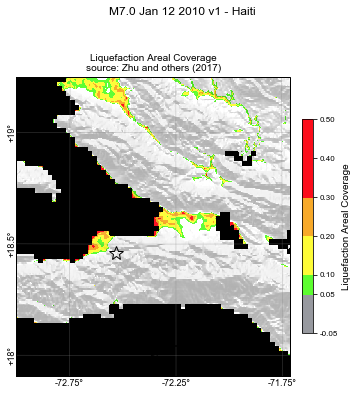

In [6]:
# read in general mapping preferences
mapconfig = ConfigObj(mapconfig)
kwargs = parseMapConfig(mapconfig, fileext=map_inputs)

#plotorder, logscale, lims, colormaps, maskthreshes = parseConfigLayers(maplayers, config)
pylab.rcParams['figure.figsize'] = (14, 10)
# Make the figure
temp = makemaps.modelMap(maplayers, shakefile, lims=lims, maskthreshes=maskthresh, plotorder=['model'],
         logscale=False, maproads=True, mapcities=True, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds,
         colormaps=colormap, **kwargs)



### Compare to the result from the original paper for this event (below)
<img src="data/images/zhu2017_general_haiti.png" alt="From Paper" style="width: 500px;" align="left"/>